<h1>Decision Trees and Machine Learning</h1>

<li>Decision trees are tree structures containing rules
<li>The leaf nodes of the tree are the "learned" categories (or threshold values)
<li>A path from the root to a leaf node represents a rule

<h3>Example: A decision tree with rules on deciding who survived or died on the titanic</h3>
<i>Source: https://en.wikipedia.org/wiki/Decision_tree_learning#/media/File:CART_tree_titanic_survivors.png</i>
<li>To use the tree, enter a person-data object and you'll get an answer</li>
<li>Ex: ("John Brown","Male","30 years old", "3 siblings") Ans: Survived (89% probability)
<li>Ex: ("Jill Jones", "Female","7 years old", "no siblings") Ans: Survived (73% probability)
<li>Ex: ("Hercules Mulligan", "Male", "2 years old", "20 siblings") Ans: Died (17% probability)
<li>Note that the 17% probability doesn't mean that there is an 83% chance that Mulligan survived!

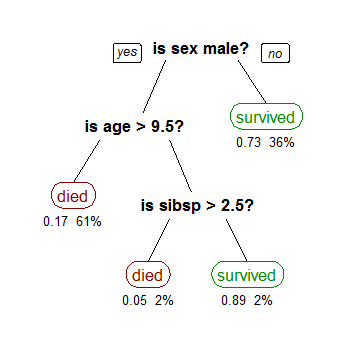

In [63]:
from IPython.display import Image
Image(filename = "CART_tree_titanic_survivors.png", width=400, height=400)

<h2>Types of decision trees</h2>
<ul>
<li><b>Classification trees</b>: Uses rules to classify cases into two or more categories (Rocks vs Mines)
<ul>
<li>Classification trees recursively split the data on a feature value
<li>Each split minimizes the cost (also known as the impurity)
<li>Cost is commonly measured using the GINI cost function (a measure of the probability of misclassification or 'purity')
</ul>
<li><b>Regression trees</b>: Uses rules to group data into target variable ranges (Wine Quality)
<ul>
<li>Also split the data on feature values
<li>Minimize cost (impurity). Usually the mean squared error
</ul>
</ul>

<h3>Stopping and Pruning Rules</h3>
<li>A minimum count of observations in each leaf node
<li>A maximum tree <b>depth</b>
<li>A maximum <b>complexity</b> (the number of splits)
<li>Using all three, you won't necessarily have a balanced tree

<h2>Predicting wine quality using a decision tree</h2>

<h3>Import the data</h3>

In [64]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
import pandas as pd
from pandas import DataFrame
w_df = pd.read_csv(url,header=0,sep=';')
w_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<h4>Build train and test samples</h4>

In [65]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(w_df, test_size = 0.3)
x_train = train.iloc[0:,0:11]
y_train = train[['quality']]
x_test = test.iloc[0:,0:11]
y_test = test[['quality']]

#Use all data for cross validation
x_data = w_df.iloc[0:,0:11]
y_data = w_df[['quality']]
#x_data
y_test

,quality
532,5
656,5
750,5
593,5
457,5
...,...
68,5
712,5
183,5
1344,5


<h3>Classifiers vs Regressors</h3>
<li>Decision tree regressors are used when the target variable is continuous and ordered (wine quality from 0 to 10)
<li>Classifiers are used when the target variable is a set of unordered categories (rocks or mines)

<h4>For wine quality, we need a regressor</h4>

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

model = DecisionTreeRegressor(max_depth = 3)
model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Details: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [67]:
#Get the R-Square for the predicted vs actuals on the text sample
print("Training R-Square",model.score(x_train,y_train))
print("Testing R-Square",model.score(x_test,y_test))

Training R-Square 0.36630667865414324
Testing R-Square 0.17405446472943398


<h3>View the tree</h3>

<h3>Download and install <a href="http://www.graphviz.org/Download.php">graphviz</a></h3>
If you are having issues using Graphviz in Windows, then try the following steps:
<ol>
<li>1. Install Graphviz 
<li>2. After installing graphviz, add it to the Computer's Path. 
<ul>
<li>Go to PC properties 
<li> Click environment variables in the advanced settings section
<li> Add C:\Program Files (x86)\Graphviz2.38\bin\ to the PATH and click Apply
</ul>
<li> Install Pydotplus. Note that you will always have to install pydot after graphviz as Pydot is Graphviz's dot language and needs Graphviz for reference. 
</ol>
<h3>Install pydotplus (using pip): Install graphviz before you install pydotplus!</h3> 

In [77]:
x_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

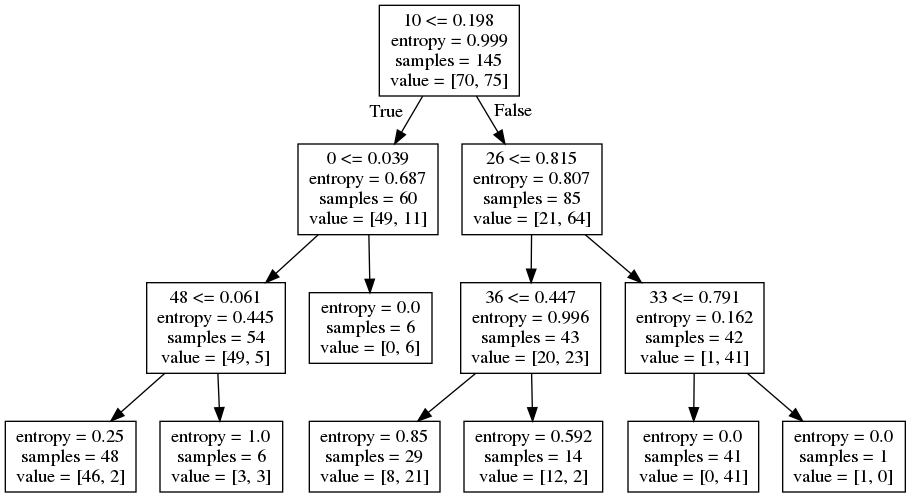

In [90]:
import pydotplus 
#feature_names = [key for key in w_df]
feature_names = [key for key in x_train.columns]
# dot_data = tree.export_graphviz(model.tree_, out_file=None,feature_names=feature_names) 
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("wines.pdf") 
#The tree will be saved to wines.pdf in your current directory

Image(graph.create_png())

<h3>Decision trees are Entropy minimizers</h3>
<li><b>Entropy</b>: a measure of uncertainty in the data<p>
what is the uncertainty in color when you draw a marble from a box of 100 blue marbles?<p>
what is the uncertainty when you draw a marble from a box with 50 blue and 50 red marbles?
<li>Entropy minimization: decision tree algorithms seek to partition the data on features in the way that total entropy is minimized

<h3>Regression trees</h3>
<li>Run regressions for each X to the dependent variable
<li>Pick the variable with the most explanatory power and split it at several points
<li>Calculate the Mean Square Error of each of the two halves for each split
<li>Pick the split point that gives the lowest mse (combined)

<h2>Cross validation</h2>

<li>Split the training set into k smaller sets (aka folds)
<li>Train the data on k-1 folds
<li>Validate the results on fold k
<li>Repeat this holding out each of the k folds in turn
<li>Report the average of all tests as the performance metric
<li>http://scikit-learn.org/stable/modules/cross_validation.html

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [92]:
#from sklearn.cross_validation import cross_val_score
#from sklearn.cross_validation import KFold
crossvalidation = KFold(n_splits=5,shuffle=True, random_state=1)

In [93]:
from sklearn import tree
import numpy as np
for depth in range(1,10):
    model = tree.DecisionTreeRegressor(
    max_depth=depth, random_state=0)
    if model.fit(x_data,y_data).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(model, x_data, y_data,scoring='neg_mean_squared_error', cv=crossvalidation, n_jobs=1))
    print ('Depth: %i Accuracy: %.3f' % (depth,score))

Depth: 1 Accuracy: -0.548
Depth: 2 Accuracy: -0.512
Depth: 3 Accuracy: -0.482
Depth: 4 Accuracy: -0.482
Depth: 5 Accuracy: -0.480
Depth: 6 Accuracy: -0.493
Depth: 7 Accuracy: -0.535
Depth: 8 Accuracy: -0.573
Depth: 9 Accuracy: -0.599


<h3>Purpose of cross-validation</h3>
<li>Not to generate a tree (it generates many trees!)
<li>But to provide an estimate of the average error of the model
<li>Roughly, the idea is to see how the model performance varies with different training sets
<li>To generate the tree, use the entire training set as before

<h1>Classification trees</h1>
<h2>Classification trees are used when dealing with categorical dependent variables</h2>
<li>Pick a variable and a split point so that the misclassification cost is the lowest.

<h3>Rocks and mines data set</h3>

In [94]:
import pandas as pd
from pandas import DataFrame
url="https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url,header=None)
df[60]=np.where(df[60]=='R',0,1)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.533654
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,1.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [95]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3)
x_train = train.iloc[0:,0:60]
y_train = train[[60]]
x_test = test.iloc[0:,0:60]
y_test = test[[60]]
y_train

,60
118,1
169,1
157,1
9,0
151,1
...,...
59,0
187,1
24,0
22,0


In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier(max_depth = 3,criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

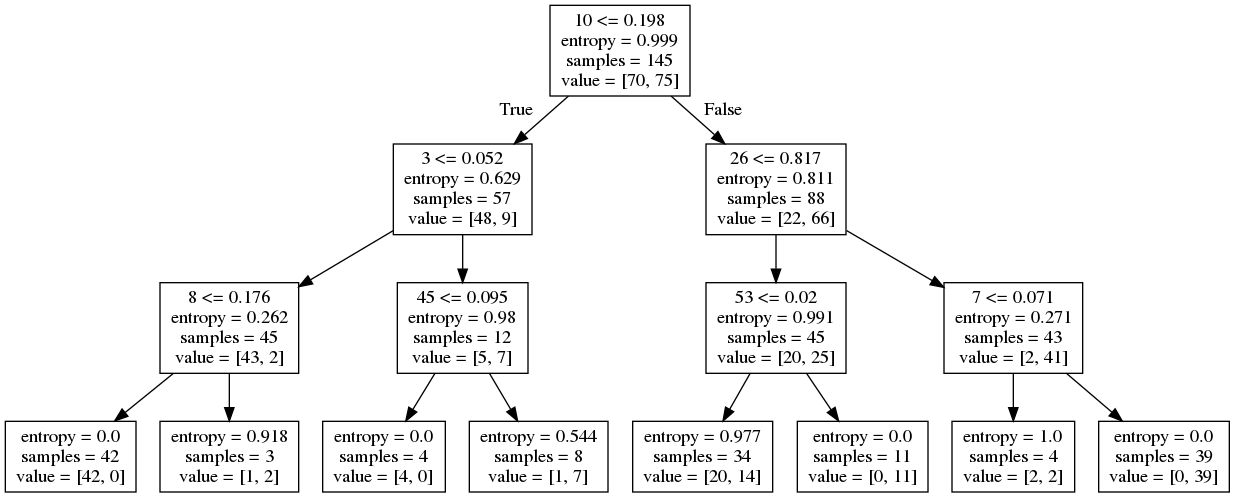

In [98]:
import pydotplus 
#feature_names = [key for key in df]
feature_names = [key for key in x_train.columns]
#dot_data = tree.export_graphviz(model.tree_, out_file=None,feature_names=feature_names) 
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("mines.pdf") 
#The tree will be saved to mines.pdf in your current directory
Image(graph.create_png())

In [99]:
def confusion_matrix(predicted, actual, threshold):
    if len(predicted) != len(actual): return -1
    tp = 0.0
    fp = 0.0
    tn = 0.0
    fn = 0.0
    for i in range(len(actual)):
        if actual[i] > 0.5: #labels that are 1.0  (positive examples)
            if predicted[i] > threshold:
                tp += 1.0 #correctly predicted positive
            else:
                fn += 1.0 #incorrectly predicted negative
        else:              #labels that are 0.0 (negative examples)
            if predicted[i] < threshold:
                tn += 1.0 #correctly predicted negative
            else:
                fp += 1.0 #incorrectly predicted positive
    rtn = [tp, fn, fp, tn]

    return rtn



In [100]:
p_train=model.predict(x_train)
p_test = model.predict(x_test)
print(confusion_matrix(p_train,np.array(y_train),.5))
print(confusion_matrix(p_test,np.array(y_test),.5))

[59.0, 16.0, 2.0, 68.0]
[20.0, 16.0, 4.0, 23.0]


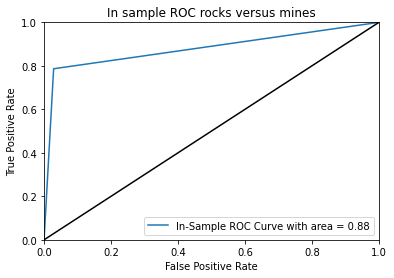

In [101]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_train,p_train)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="In-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()


In [102]:
fpr,tpr,thresholds

(array([0.        , 0.02857143, 1.        ]),
 array([0.        , 0.78666667, 1.        ]),
 array([2, 1, 0]))

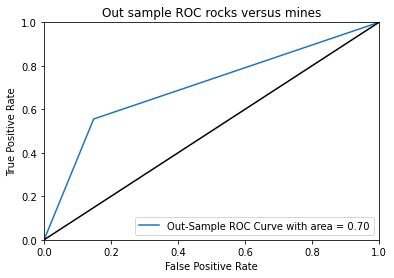

In [103]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_test,p_test)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Out sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()
